### **Introducción a Tensorflow**

In [1]:
!pip install h5py

Importar librerías

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

Importar librería de tensorflow

In [4]:
import tensorflow as tf

In [5]:
# Confirmar que tensorflow está instalado
print(tf.__version__)

2.13.0


Leer y visualizar el conjunto de datos

In [6]:
X, y = make_moons(n_samples=500, noise=0.5, random_state=3)

In [7]:
df = pd.DataFrame(dict(X1=X[:,0], X2=X[:,1], label=y))
print(df.shape)
df.head()

(500, 3)


,X1,X2,label
0,-0.736742,1.157796,0
1,0.060443,0.395688,1
2,0.273094,0.699206,0
3,-1.579686,-0.525806,0
4,-0.888143,0.636437,0


In [8]:
df.label.value_counts()

0    250
1    250
Name: label, dtype: int64

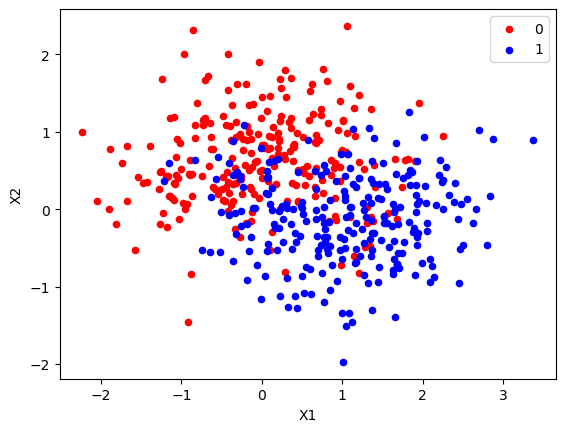

In [9]:
colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])
plt.show()

Separación del conjunto de datos




In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
print('Tamaño del conjunto de datos de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de datos de prueba: ', X_test.shape)

Tamaño del conjunto de datos de entrenamiento:  (400, 2)
Tamaño del conjunto de datos de prueba:  (100, 2)


In [12]:
pos_class = np.count_nonzero(y_train == 1) # Conteo de los valores "non-zero" en el arreglo
print('Número de elementos en la clase positiva ',pos_class)
neg_class = np.count_nonzero(y_train == 0)
print('Número de elementos en la clase negativa ',neg_class)

Número de elementos en la clase positiva  200
Número de elementos en la clase negativa  200


In [13]:
pos_class = np.count_nonzero(y_test == 1) # Conteo de los valores "non-zero" en el arreglo
print('Número de elementos en la clase positiva ',pos_class)
neg_class = np.count_nonzero(y_test == 0)
print('Número de elementos en la clase negativa ',neg_class)

Número de elementos en la clase positiva  50
Número de elementos en la clase negativa  50


## Ciclo de vida del modelo



**1.   Definción del modelo**


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# define model
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=2))



**2.   Compilación del modelo**

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Visualización del modelo

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.



**3.   Ajuste del modelo**

In [19]:
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=300,verbose=1)

Epoch 1/300
13/13 [==============================] - 2s 32ms/step - loss: 0.7626 - accuracy: 0.5650 - val_loss: 0.7579 - val_accuracy: 0.5700
Epoch 2/300
13/13 [==============================] - 0s 7ms/step - loss: 0.7574 - accuracy: 0.5650 - val_loss: 0.7535 - val_accuracy: 0.5700
Epoch 3/300
13/13 [==============================] - 0s 6ms/step - loss: 0.7523 - accuracy: 0.5650 - val_loss: 0.7493 - val_accuracy: 0.5700
Epoch 4/300
13/13 [==============================] - 0s 6ms/step - loss: 0.7471 - accuracy: 0.5625 - val_loss: 0.7452 - val_accuracy: 0.5800
Epoch 5/300
13/13 [==============================] - 0s 6ms/step - loss: 0.7421 - accuracy: 0.5700 - val_loss: 0.7411 - val_accuracy: 0.5800
Epoch 6/300
13/13 [==============================] - 0s 6ms/step - loss: 0.7371 - accuracy: 0.5750 - val_loss: 0.7370 - val_accuracy: 0.5900
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 0.7325 - accuracy: 0.5750 - val_loss: 0.7329 - val_accuracy: 0.5900
Epoch 8/300


Epoch 59/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5685 - accuracy: 0.7000 - val_loss: 0.5992 - val_accuracy: 0.5600
Epoch 60/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5666 - accuracy: 0.7025 - val_loss: 0.5976 - val_accuracy: 0.5600
Epoch 61/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5647 - accuracy: 0.7050 - val_loss: 0.5959 - val_accuracy: 0.5700
Epoch 62/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5627 - accuracy: 0.7075 - val_loss: 0.5944 - val_accuracy: 0.5700
Epoch 63/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5608 - accuracy: 0.7075 - val_loss: 0.5929 - val_accuracy: 0.5700
Epoch 64/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.7150 - val_loss: 0.5914 - val_accuracy: 0.5700
Epoch 65/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5573 - accuracy: 0.7150 - val_loss: 0.5899 - val_accuracy: 0.5700
Epoch 

13/13 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7750 - val_loss: 0.5330 - val_accuracy: 0.7000
Epoch 117/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4899 - accuracy: 0.7750 - val_loss: 0.5322 - val_accuracy: 0.7000
Epoch 118/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4890 - accuracy: 0.7750 - val_loss: 0.5314 - val_accuracy: 0.7000
Epoch 119/300
13/13 [==============================] - 0s 6ms/step - loss: 0.4881 - accuracy: 0.7750 - val_loss: 0.5306 - val_accuracy: 0.7000
Epoch 120/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4872 - accuracy: 0.7775 - val_loss: 0.5297 - val_accuracy: 0.7000
Epoch 121/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7775 - val_loss: 0.5289 - val_accuracy: 0.7000
Epoch 122/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.7775 - val_loss: 0.5281 - val_accuracy: 0.7000
Epoch 123/300

13/13 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.8050 - val_loss: 0.4951 - val_accuracy: 0.7400
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.8050 - val_loss: 0.4946 - val_accuracy: 0.7400
Epoch 175/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.8050 - val_loss: 0.4941 - val_accuracy: 0.7400
Epoch 176/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4477 - accuracy: 0.8050 - val_loss: 0.4936 - val_accuracy: 0.7400
Epoch 177/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4472 - accuracy: 0.8100 - val_loss: 0.4931 - val_accuracy: 0.7400
Epoch 178/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4467 - accuracy: 0.8100 - val_loss: 0.4927 - val_accuracy: 0.7400
Epoch 179/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4461 - accuracy: 0.8125 - val_loss: 0.4921 - val_accuracy: 0.7400
Epoch 180/300

13/13 [==============================] - 0s 4ms/step - loss: 0.4248 - accuracy: 0.8250 - val_loss: 0.4722 - val_accuracy: 0.7400
Epoch 231/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.8250 - val_loss: 0.4719 - val_accuracy: 0.7400
Epoch 232/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4242 - accuracy: 0.8275 - val_loss: 0.4716 - val_accuracy: 0.7400
Epoch 233/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4239 - accuracy: 0.8300 - val_loss: 0.4713 - val_accuracy: 0.7400
Epoch 234/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4236 - accuracy: 0.8275 - val_loss: 0.4710 - val_accuracy: 0.7400
Epoch 235/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4233 - accuracy: 0.8275 - val_loss: 0.4707 - val_accuracy: 0.7400
Epoch 236/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4229 - accuracy: 0.8275 - val_loss: 0.4703 - val_accuracy: 0.7400
Epoch 237/300

13/13 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8300 - val_loss: 0.4598 - val_accuracy: 0.7500
Epoch 288/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.8300 - val_loss: 0.4596 - val_accuracy: 0.7500
Epoch 289/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8300 - val_loss: 0.4595 - val_accuracy: 0.7500
Epoch 290/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4102 - accuracy: 0.8300 - val_loss: 0.4593 - val_accuracy: 0.7500
Epoch 291/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4101 - accuracy: 0.8300 - val_loss: 0.4591 - val_accuracy: 0.7500
Epoch 292/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4099 - accuracy: 0.8300 - val_loss: 0.4590 - val_accuracy: 0.7500
Epoch 293/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.8300 - val_loss: 0.4589 - val_accuracy: 0.7500
Epoch 294/300


**4.   Evaluación del modelo**

In [20]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')
print(f'Test Loss: {loss:.3f}')

Test Accuracy: 0.750
Test Loss: 0.458


Predicción en el conjunto de datos de prueba

In [21]:
y_pred = model.predict(X_test)
print(y_pred)

4/4 [==============================] - 0s 2ms/step
[[0.42892283]
 [0.4335119 ]
 [0.6503214 ]
 [0.12891287]
 [0.95843273]
 [0.51661915]
 [0.1952318 ]
 [0.51569945]
 [0.06135829]
 [0.9524928 ]
 [0.79550177]
 [0.4938462 ]
 [0.9828979 ]
 [0.9132834 ]
 [0.8891609 ]
 [0.85048   ]
 [0.89586717]
 [0.6659781 ]
 [0.387283  ]
 [0.1738    ]
 [0.00898652]
 [0.19135831]
 [0.18765901]
 [0.7331403 ]
 [0.65280557]
 [0.45100853]
 [0.68120784]
 [0.57754844]
 [0.09018099]
 [0.8771789 ]
 [0.9205284 ]
 [0.05915441]
 [0.23917672]
 [0.20259131]
 [0.25972787]
 [0.9455146 ]
 [0.52768415]
 [0.903507  ]
 [0.9553066 ]
 [0.01804279]
 [0.15391988]
 [0.15810268]
 [0.25762513]
 [0.38178238]
 [0.37375918]
 [0.8884433 ]
 [0.04391031]
 [0.11561471]
 [0.24596974]
 [0.95942205]
 [0.9187733 ]
 [0.3602766 ]
 [0.3100677 ]
 [0.15373945]
 [0.21613687]
 [0.26392046]
 [0.29841337]
 [0.7386237 ]
 [0.10180022]
 [0.88457745]
 [0.97307026]
 [0.39306092]
 [0.4867993 ]
 [0.86398435]
 [0.57476974]
 [0.09181064]
 [0.57428473]
 [0.1854176

In [22]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(y_pred)

4/4 [==============================] - 0s 2ms/step
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]


Matriz de confusión

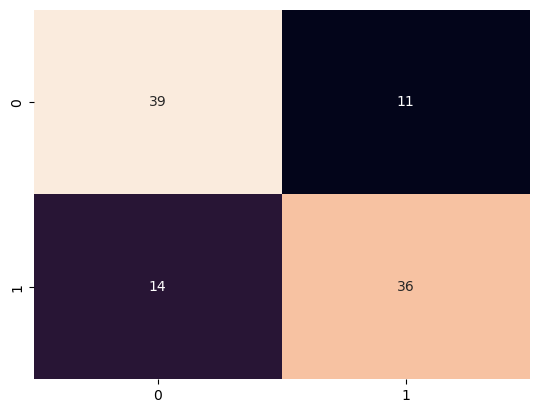

In [23]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cbar=False)
plt.show()

Visualizar la frontera de decisión

9600/9600 [==============================] - 11s 1ms/step


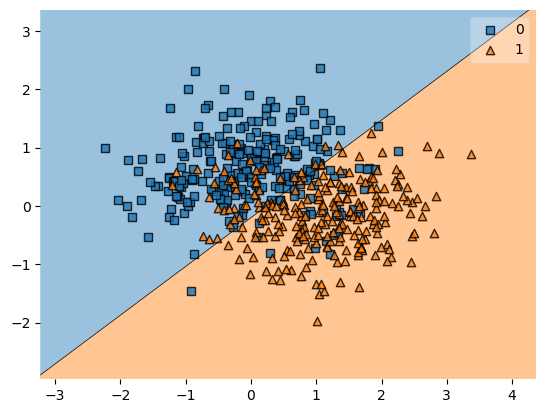

In [24]:
plot_decision_regions(X, y, clf=model, legend=1)
plt.show()


**5.   Realizar una predicción**

In [26]:
new_value = [0,-1.98]
prediction = (model.predict([new_value]) > 0.5).astype("int32")
print('Predicción: ', prediction)

1/1 [==============================] - 0s 56ms/step
Predicción:  [[1]]


Guardar el modelo

In [30]:
model.save('simple_model.h5')

Cargar el modelo

In [28]:
from tensorflow.keras.models import load_model

In [31]:
perceptron = load_model('simple_model.h5')

In [32]:
new_value = [-1.40,2.57]
prediction = (perceptron.predict([new_value]) > 0.5).astype("int32")
print('Predicción: ', prediction)

1/1 [==============================] - 0s 93ms/step
Predicción:  [[0]]
